In [1]:
%matplotlib inline

For applications with static fields it's considerably more efficient to interpolate cached field values than to calculate them from the potential arrays.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
bool_cmap = colors.ListedColormap([(1, 1, 1, 0), 'black'])
from scipy.constants import centi, milli
from fastadjust.io import h5read

In [3]:
# SIMION array
fil = os.path.join(r"../data", "quad.h5")
fa = h5read(fil)
# move xy origin to center of the grid
fa.x0 = - (fa.nx - 1) * fa.dx / 2 
fa.y0 = - (fa.ny - 1) * fa.dy / 2

In [4]:
voltages = np.array([2.5, 2.5, -2.5, -2.5], dtype='float64')
xvals = np.arange(-10, 10, .1) * 1e-3

In [5]:
# field amplitude
%timeit fa.amp_field_r((-0.00101, 0.00081, 0.075), voltages)
f1 = np.array([fa.amp_field_r((x, 0, 0.075), voltages) * centi for x in xvals])

286 µs ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
# calculate from cache
famp = fa.amp_field(voltages)
%timeit fa.interp_r(famp, (-0.00101, 0.00081, 0.075))
f2 = np.array([fa.interp_r(famp, (x, 0, 0.075)) * centi for x in xvals])

10.1 µs ± 714 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


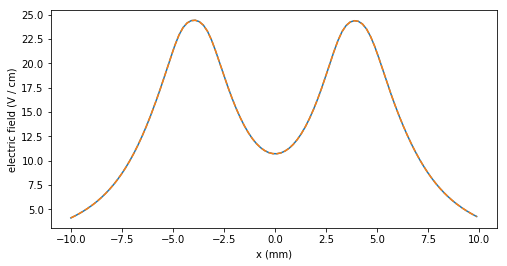

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xvals / milli, f1)
ax.plot(xvals / milli, f2, ls='--')
ax.set_ylabel('electric field (V / cm)')
ax.set_xlabel('x (mm)')
plt.show()

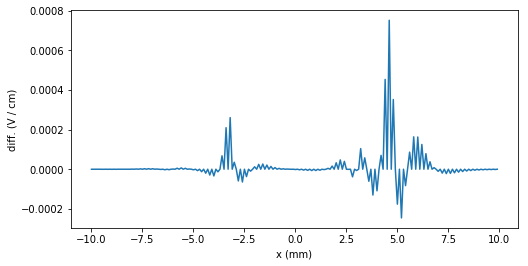

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xvals / milli, f1 - f2)
ax.set_ylabel('diff. (V / cm)')
ax.set_xlabel('x (mm)')
plt.show()

In [9]:
# gradient of the field
%timeit fa.grad_field_r((-0.00101, 0, 0.075), voltages)

1.78 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
# calculate from cache
%timeit fa.grad_r(famp, (-0.00101, 0, 0.075))

56.7 µs ± 600 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


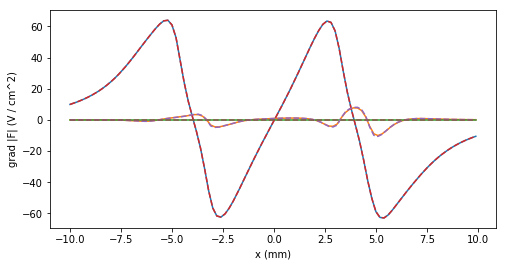

In [11]:
gx1, gy1, gz1 = np.array([np.array(fa.grad_field_r((x, 0, 0.075), voltages)) * centi**2.0 for x in xvals]).T
gx2, gy2, gz2 = np.array([np.array(fa.grad_r(famp, (x, 0, 0.075))) * centi**2.0 for x in xvals]).T

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xvals / milli, gx1)
ax.plot(xvals / milli, gy1)
ax.plot(xvals / milli, gz1)
ax.plot(xvals / milli, gx2, ls='--')
ax.plot(xvals / milli, gy2, ls='--')
ax.plot(xvals / milli, gz2, ls='--')
ax.set_ylabel('grad |F| (V / cm^2)')
ax.set_xlabel('x (mm)')
plt.show()

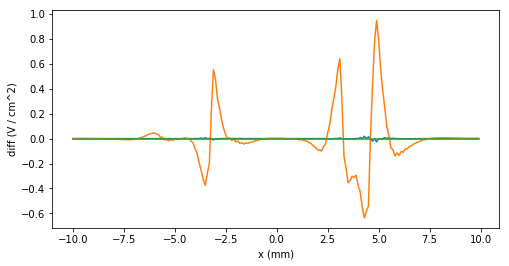

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xvals / milli, gx1 - gx2)
ax.plot(xvals / milli, gy1 - gy2)
ax.plot(xvals / milli, gz1 - gz2)
ax.set_ylabel('diff (V / cm^2)')
ax.set_xlabel('x (mm)')
plt.show()